# Download data from DHI Altimetry API
Altimetry data (water level, significant wave height and wind speed) obtained from satellites are very useful for validation of models as the data are available globally since 1985 and up to 12 hour before now. 

DHI has an altimetry portal with an [api](https://altimetry-shop-data-api.dhigroup.com/apidoc) where you can download the data. 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fmskill.data import DHIAltimetryRepository
from fmskill import TrackObservation
from mikeio import eum
%matplotlib inline

In [2]:
api_key = os.environ["DHI_ALTIMETRY_API_KEY"]
repo = DHIAltimetryRepository(api_key)

In [3]:
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


In [4]:
repo.get_observation_stats()

,min_date,max_date,count
short_name,,,
c2,2010-07-16 00:12:43.416148,2021-10-11 07:51:44.018827,246825954
n1,2002-05-14 18:32:32.755126,2012-04-08 10:54:23.635591,257633695
j1,2002-01-15 06:07:31.458256,2013-06-21 00:56:32.487362,224260047
sa,2013-03-14 05:39:27.811666,2021-10-11 07:43:45.205735,178827458
6a,2020-11-30 14:26:01.000000,2021-10-11 02:05:47.000000,19250679
j2,2008-07-04 12:19:19.570865,2019-10-01 08:04:57.954027,225297275
pn,1992-10-01 16:45:03.540531,2002-07-12 14:28:19.397424,15718916
gs,1985-03-31 00:00:00.861264,1989-12-30 14:57:52.901281,75115692
j3,2016-02-12 01:11:09.095919,2021-10-11 05:30:07.173109,120378951


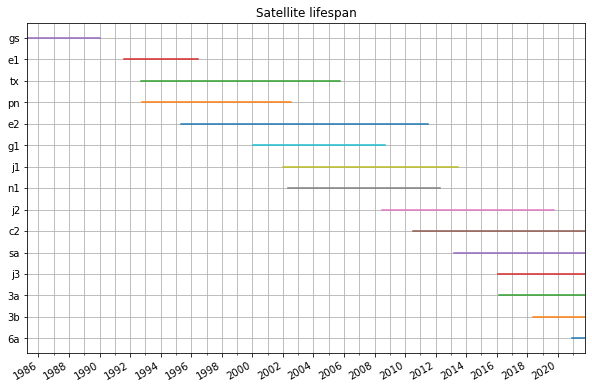

In [5]:
repo.plot_observation_stats();

In [6]:
repo.time_of_newest_data

Timestamp('2021-10-11 07:51:44.018827')

## Temporal coverage
For a specific area and temporal selection, an overview of the temporal coverage can be obtained with the get_daily_count() method.

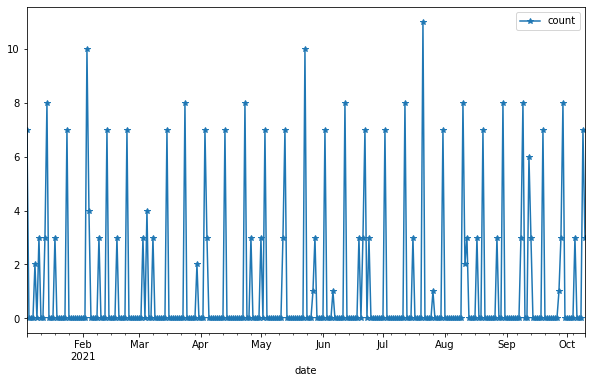

In [7]:
df = repo.get_daily_count("lon=10.9&lat=55.9&radius=10.0", start_time="2021")
df.plot(marker="*", figsize=(10,6));

## Spatial coverage
An overview of the spatial data coverage for a specified area and time period can be obtained with the get_spatial_coverage() method

In [8]:
area = "bbox=10.0,54.0,12.0,58.0"
gdf = repo.get_spatial_coverage(area, start_time="2021")

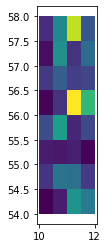

In [9]:
gdf.plot('count');

In [10]:
# Download coastline and countries from public source
import geopandas
coastline = geopandas.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_coastline.geojson")
countries = geopandas.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

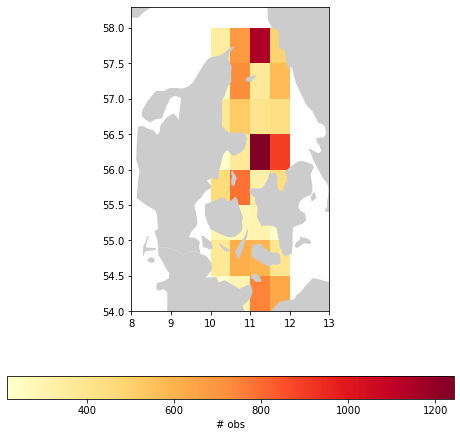

In [11]:
ax = gdf.plot('count', legend=True, figsize=(8,8), legend_kwds={'label': "# obs", 'orientation': "horizontal"}, cmap='YlOrRd')
countries.plot(ax=ax, color='0.8')
ax.set_xlim((8,13))
ax.set_ylim((54,58.3))
ax.set_aspect(1.0 / np.cos(np.pi * 56 / 180))

## Download the data
The actual data is downloaded using the get_altimetry_data() method. Let's download a month's data a circle with 100km radius in the North Sea.

In [12]:
data = repo.get_altimetry_data(area="lon=2.9&lat=55.9&radius=100", start_time="2019-10-1", end_time="2019-11-1")
data.df.head()

Succesfully retrieved 1006 records from API in 0.88 seconds


,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads
datetime,,,,,,,,,,,,,,,
2019-10-01 01:53:30.689,3.780429,55.203699,0.0077,1.942423,5.783530,221652.719762,-41.000000,c2,0,0.0597,0.046,1.975,0.256,5.834183,5.16
2019-10-01 01:53:31.633,3.770297,55.260700,0.0287,1.892914,5.836653,227674.772499,-33.931813,c2,0,0.0654,0.048,1.922,0.333,5.886469,5.21
2019-10-01 01:53:32.576,3.760148,55.317701,0.0558,1.838815,6.055494,233715.397905,-28.000000,c2,0,0.0801,0.038,1.864,0.273,6.101864,5.40
2019-10-01 01:53:33.519,3.749980,55.374701,0.0496,1.930273,6.255549,239773.215489,-28.000000,c2,0,0.0645,0.050,1.962,0.374,6.298769,5.56
2019-10-01 01:53:34.463,3.739795,55.431700,0.0752,1.952707,5.972225,245847.148937,-31.000000,c2,0,0.0815,0.048,1.986,0.311,6.019907,5.33


In [13]:
data.query_params

{'lon': '2.9',
 'lat': '55.9',
 'radius': '100',
 'start_date': '20191001',
 'end_date': '20191101'}

## Quality flag

Each data point has a quality flag: 

0. Good
1. Acceptable
2. Bad

Let's keep only the good data.

In [14]:
data.df = data.df[data.df.quality==0]

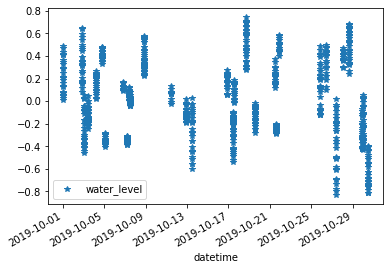

In [15]:
data.df[['water_level']].plot(style="*");

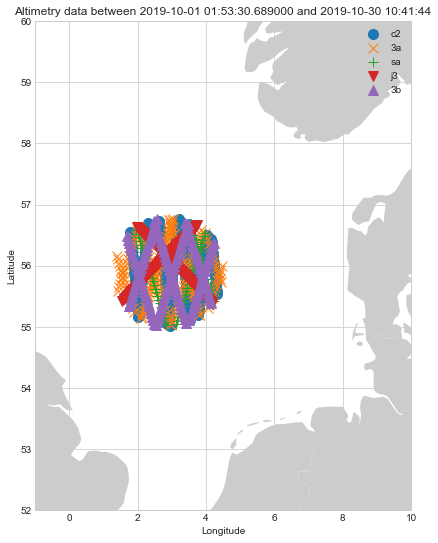

In [16]:
data.plot_map()
ax = plt.gca()
countries.plot(ax=ax, color='0.8')
ax.set_xlim((-1,10))
ax.set_ylim((52,60))
ax.set_aspect(1.0 / np.cos(np.pi * 56 / 180))

## fmskill.TrackObservation object

In [17]:
obs = TrackObservation(data.df, item="significant_wave_height", name='Altimetry c2, 3a, sa, j3')
obs.itemInfo = eum.ItemInfo(eum.EUMType.Significant_wave_height)
obs

TrackObservation: Altimetry c2, 3a, sa, j3, n=882

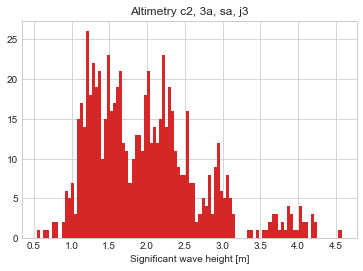

In [18]:
obs.hist();

It is now ready for comparison with you model results...

## Get all observations in model domain

In [19]:
from fmskill import ModelResult
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ModelResult(fn, name='MIKE21SW', item=0)
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Number of items: 15
Time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

In [20]:
# string representation of domain boundary polyline
xy = mr.dfs.boundary_polylines.exteriors[0].xy
SW_domain=np.array2string(xy.flatten(), formatter={'float_kind':lambda x: "%.4f" % x}, max_line_width=1000000, separator=',').replace('[','polygon=').replace(']','')

In [21]:
start = mr.start_time
end = mr.end_time
data = repo.get_altimetry_data(area=SW_domain, start_time=start, end_time=end)
data.df.head()

Succesfully retrieved 367 records from API in 0.67 seconds


,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads
datetime,,,,,,,,,,,,,,,
2017-10-27 10:45:19,1.262463,55.298639,0.3778,2.240740,9.600170,148856.276678,-67.506027,3a,0,0.1940,0.0587,2.255,0.400,9.581609,9.23
2017-10-27 10:45:20,1.230990,55.241321,0.4375,2.122240,9.743679,143450.079792,-64.900677,3a,0,0.2411,0.0424,2.130,0.464,9.723277,9.36
2017-10-27 10:45:21,1.199594,55.183996,0.4489,2.263492,9.600170,138052.640961,-63.659107,3a,0,0.2399,0.0455,2.279,0.349,9.581609,9.19
2017-10-27 10:45:22,1.168277,55.126665,0.4711,2.121292,9.564314,132754.802194,-64.202776,3a,0,0.2490,0.0413,2.129,0.286,9.546213,9.17
2017-10-27 10:45:23,1.137037,55.069327,0.4678,2.078632,9.456805,127587.167133,-58.527079,3a,0,0.2323,0.0600,2.084,0.361,9.440084,9.09


In [22]:
data.satellites

['3a', 'c2', 'j2', 'j3', 'sa']

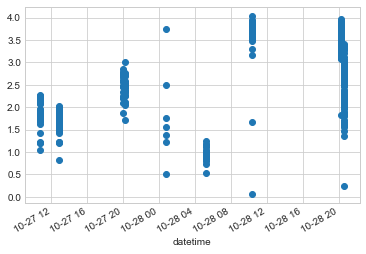

In [23]:
data.df.significant_wave_height.plot(style='o');

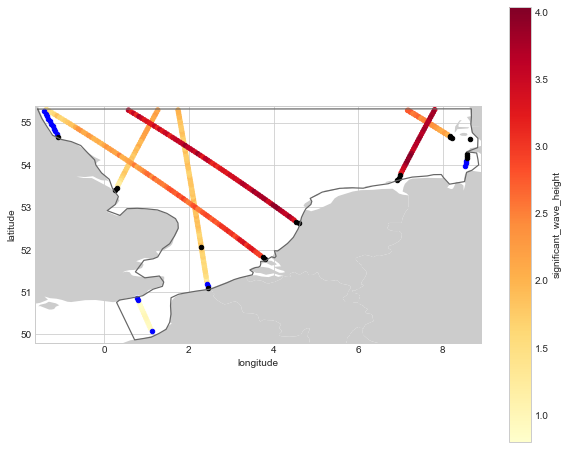

In [25]:
ax = mr.dfs.plot(plot_type='outline_only', figsize=(10,8))
countries.plot(ax=ax, color='0.8')
df = data.df
df[df.quality==0].plot.scatter(x='longitude', y='latitude', c='significant_wave_height', cmap='YlOrRd', ax=ax);
df[df.quality==1].plot.scatter(x='longitude', y='latitude', c='blue', ax=ax);
df[df.quality==2].plot.scatter(x='longitude', y='latitude', c='black', ax=ax);

In [26]:
data.print_records_per_satellite()

For the selected area between 2017-10-27 10:45:19 and 2017-10-28 20:36:40.787000:
Satellite 3a has 64 records
Satellite c2 has 83 records
Satellite j2 has 87 records
Satellite j3 has 108 records
Satellite sa has 25 records


In [27]:
data.to_dfs0('alti_data.dfs0')

## Clean up

In [ ]:
import os
os.remove('alti_data.dfs0')